<a href="https://colab.research.google.com/github/YANZHANLIN/Pytorch_exercise/blob/main/simple_network_241010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# COURSE1-3 TORCH BASIC

In [ ]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# reshape and view
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch2 = torch.arange(10)
my_torch2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch2 = my_torch2.reshape(2,-1)
my_torch2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch3 = my_torch2.reshape(-1,2)
my_torch3

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
my_torch4 = torch.arange(15)
my_torch4

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
my_torch4 = my_torch4.view(5,-1)
my_torch4

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [ ]:
my_torch4 = my_torch4.reshape(5,-1)
my_torch4

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [ ]:
# difference between view and reshape in pytorch?


In [ ]:
# with reshape and view, they will update

In [ ]:
my_torch5 = torch.arange(10)
my_torch5

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
my_torch6 = my_torch5.reshape(2,5)
my_torch6

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [ ]:
my_torch5[1] = 4141
my_torch5

tensor([   0, 4141,    2,    3,    4,    5,    6,    7,    8,    9])

In [ ]:
my_torch6

tensor([[   0, 4141,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [ ]:
# slices
my_torch7 = torch.arange(10)
my_torch7

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# grab a specific item
my_torch7[7]

tensor(7)

In [ ]:
# grab slice
my_torch8 = my_torch7.reshape(5,2)
my_torch8

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [ ]:
my_torch8[:,1]

tensor([1, 3, 5, 7, 9])

In [ ]:
# return a column
my_torch8[:,1:]

tensor([[1],
        [3],
        [5],
        [7],
        [9]])

# COURSE4 TORCH BASIC

In [ ]:
tensor_a = torch.tensor([1,2,3,4])
tensor_b = torch.tensor([5,6,7,8])

In [ ]:
#addition shorthand
tensor_a + tensor_b

tensor([ 6,  8, 10, 12])

In [ ]:
#addition longhand
torch.add(tensor_a, tensor_b)

tensor([ 6,  8, 10, 12])

In [ ]:
# subtract
tensor_b - tensor_a

tensor([4, 4, 4, 4])

In [ ]:
#remainder  ?
torch.remainder(tensor_a, tensor_b)

tensor([1, 2, 3, 4])

In [ ]:
torch.remainder(tensor_b, tensor_a)

tensor([0, 0, 1, 0])

In [ ]:
#multiplication
tensor_b * tensor_a

tensor([ 5, 12, 21, 32])

In [ ]:
#power of/exponents
torch.pow(tensor_a, tensor_b)

tensor([    1,    64,  2187, 65536])

In [ ]:
#reassignment
tensor_a = tensor_a +tensor_b
tensor_a.add_(tensor_b)

tensor([11, 14, 17, 20])

In [ ]:
tensor_a

tensor([11, 14, 17, 20])

In [ ]:
# error!!!!
#torch.add_(tensor_a, tensor_b)

# COURSE5,6,7,8--BUILD BASIC NN,IMPORT DATA, TRAIN MODEL, EVALUATE TEST DATA SET, EVALUATE NEW DATA

**create a model**

In [ ]:
# create a model class that inherits nn.module
class Model(nn.Module):
  # input layer (4 features of flowers) ---->
  # hidden layer1(number of neurons) --->
  # h2 --->
  # output(3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# pick a manual seed for randomization
torch.manual_seed(32)
# create an instance of model
model = Model()

**load data from websites**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# change last column from strings to integers or floats
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**train test data spliting**

In [ ]:
# train test split! set x, y,   then convert these to numpy array  .values
x = my_df.drop('species', axis=1).values
y = my_df['species'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# run train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [ ]:
# convert x features and y labels to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)   #what is longttensor? ---64 bit integers

**loss function and gradient descent**

In [ ]:
# set the criterion of model to measure the error, how far ogg the prediction are from the data ground truth
criterion = nn.CrossEntropyLoss()
# adam --- choose optimizer, lr =learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
model.parameters  #different from video "https://www.youtube.com/watch?v=Xp0LtPBcos0"

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

**model training**

In [ ]:
# Train model
# epochs ? one run through all the training data in dataset
epochs = 500
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)

  # measure the loss/error, ganna be high at first
  loss = criterion(y_pred, y_train)

  # keep track of losses, detach losses
  losses.append(loss.detach().numpy())

  # print every ten epochs
  if i % 10 == 0:
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

  # do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch:  0  loss: 0.04151119
epoch: 10  loss: 0.04149666
epoch: 20  loss: 0.04148259
epoch: 30  loss: 0.04146904
epoch: 40  loss: 0.04145598
epoch: 50  loss: 0.04144343
epoch: 60  loss: 0.04143137
epoch: 70  loss: 0.04141987
epoch: 80  loss: 0.04140884
epoch: 90  loss: 0.04139840
epoch: 100  loss: 0.04138841
epoch: 110  loss: 0.04137896
epoch: 120  loss: 0.04136997
epoch: 130  loss: 0.04136147
epoch: 140  loss: 0.04135345
epoch: 150  loss: 0.04134593
epoch: 160  loss: 0.04133883
epoch: 170  loss: 0.04133217
epoch: 180  loss: 0.04132593
epoch: 190  loss: 0.04132010
epoch: 200  loss: 0.04131467
epoch: 210  loss: 0.04130958
epoch: 220  loss: 0.04130486
epoch: 230  loss: 0.04130046
epoch: 240  loss: 0.04129641
epoch: 250  loss: 0.04129259
epoch: 260  loss: 0.04128914
epoch: 270  loss: 0.04128591
epoch: 280  loss: 0.04128296
epoch: 290  loss: 0.04128021
epoch: 300  loss: 0.04127771
epoch: 310  loss: 0.04127540
epoch: 320  loss: 0.04127325
epoch: 330  loss: 0.04127125
epoch: 340  loss: 0.0412

**graph loss of model**

Text(0.5, 0, 'Epoch')

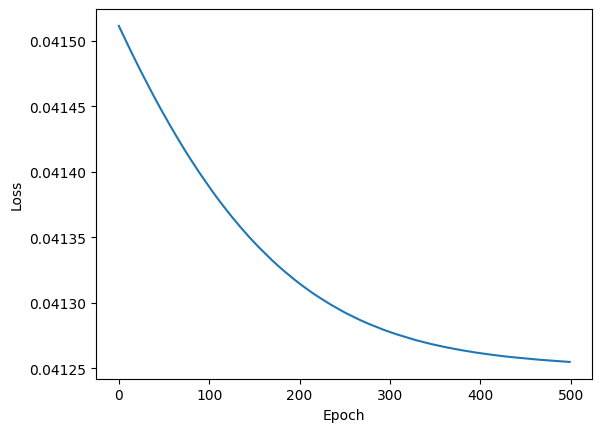

In [ ]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

**evaluate model on test dataset**

In [ ]:
# evaluate model on test data set
with torch.no_grad():  # turn off back prop, why?
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)
  print(f'Loss: {loss}')
  #print(f'Accuracy: {accuracy}')
  #print(f'Precision: {precision}')
  #print(f'Recall: {recall}')
  #print(f'F1 Score: {f1}')
  #print(f'Confusion Matrix: {confusion_matrix}')
  #print(f'Classification Report: {classification_report}')
  #print(f'ROC AUC Score: {roc_auc_score}')
  #print(f'PR AUC Score: {pr_auc_score}')
  #print(f'PR Curve: {pr_curve}')
  #print(f'ROC Curve: {roc_curve}')
  #print(f'AUC Score: {auc_score}')

Loss: 0.04616040736436844


In [ ]:
correct = 0   # what is this ?
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'setosa'
    elif y_test[i] == 1:
      x = 'versicolor'
    else:
      x = 'virginica'

    # will tell us what type of flower our network thinks it is
    print(f'{i+1:2}. {str(data.numpy()):28}  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):1.2f}% correct')

 1. [5.7 2.9 4.2 1.3]             tensor([-7.2716,  9.0951, -1.5513]) 	 1 	 1
 2. [6.7 3.1 4.4 1.4]             tensor([-8.0359,  9.7620, -1.4817]) 	 1 	 1
 3. [4.7 3.2 1.6 0.2]             tensor([ 13.0796,   1.7477, -15.2458]) 	 0 	 0
 4. [6.5 2.8 4.6 1.5]             tensor([-11.5842,   8.4498,   2.1996]) 	 1 	 1
 5. [6.1 2.6 5.6 1.4]             tensor([-18.6762,   5.9983,   9.3544]) 	 2 	 2
 6. [6.3 3.3 6.  2.5]             tensor([-25.6264,   2.8335,  16.6166]) 	 2 	 2
 7. [4.8 3.4 1.9 0.2]             tensor([ 12.4996,   2.1414, -15.0373]) 	 0 	 0
 8. [5.1 3.5 1.4 0.3]             tensor([ 13.9172,   1.7110, -16.0588]) 	 0 	 0
 9. [6.4 3.1 5.5 1.8]             tensor([-19.4242,   5.4440,  10.1936]) 	 2 	 2
10. [6.9 3.2 5.7 2.3]             tensor([-24.5404,   3.5504,  15.3548]) 	 2 	 2
11. [6.8 3.2 5.9 2.3]             tensor([-25.5027,   3.1243,  16.3425]) 	 2 	 2
12. [4.4 3.  1.3 0.2]             tensor([ 13.0709,   1.6014, -15.0838]) 	 0 	 0
13. [6.3 3.4 5.6 2.4]             

**evaluate on new data**

In [ ]:
new_iris = torch.tensor([5.6, 3.7, 2.2, 0.2])

In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))  # print(model.(new_iris))  whats the difference?
  print(model.forward(new_iris).argmax().item())

tensor([ 12.2506,   2.8631, -15.3741])
0


# COURSE 9--SAVE AND LOAD NN MODEL

In [ ]:
# save NN model
torch.save(model.state_dict(), 'simple_iris_model.pt')  # .pt and .pth?

In [ ]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('simple_iris_model.pt'))

<ipython-input-93-e479b3224099>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('simple_iris_model.pt'))


<All keys matched successfully>

In [ ]:
# make sure loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)